In [1]:
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import math

In [38]:
class Punkty:
    extensja = list()
    def __init__(self, grid):
        self.x = (random.randrange(0, grid)) + (random.randrange(1, 9)/10)
        self.y = (random.randrange(0, grid)) + (random.randrange(1, 9)/10)
        self.klasa = None
        Punkty.extensja.append(self)
    
    @classmethod
    def return_x(cls):
        return [ p.x for p in Punkty.extensja]
    
    @classmethod
    def return_y(cls):
        return [ p.y for p in Punkty.extensja]
        
        
    def __str__(self):
        return f'x: {self.x} y: {self.y} class: {self.klasa}'
    

for n in range(20):
    Punkty(3)
print('x', Punkty.return_x())
print('y', Punkty.return_y())

x [1.1, 2.5, 0.4, 2.8, 0.8, 1.7, 0.8, 1.5, 0.7, 2.4, 2.5, 0.1, 2.8, 0.4, 1.8, 2.7, 0.1, 0.8, 1.8, 2.1]
y [2.8, 2.7, 1.7, 0.3, 2.6, 1.3, 0.4, 1.3, 0.3, 0.5, 1.2, 2.6, 2.6, 2.3, 1.6, 1.6, 2.8, 0.3, 2.4, 1.2]


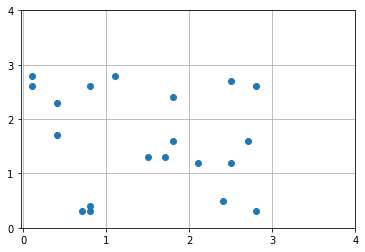

In [95]:
x = [1.1, 2.5, 0.4, 2.8, 0.8, 1.7, 0.8, 1.5, 0.7, 2.4, 2.5, 0.1, 2.8, 0.4, 1.8, 2.7, 0.1, 0.8, 1.8, 2.1]
y = [2.8, 2.7, 1.7, 0.3, 2.6, 1.3, 0.4, 1.3, 0.3, 0.5, 1.2, 2.6, 2.6, 2.3, 1.6, 1.6, 2.8, 0.3, 2.4, 1.2]

plt.scatter(x, y)
plt.xticks(list(range(5)))
plt.yticks(list(range(5)))
plt.grid()
plt.show()

In [96]:
points = list(zip(x,y))
points = [list(x) for x in points]
points

[[1.1, 2.8],
 [2.5, 2.7],
 [0.4, 1.7],
 [2.8, 0.3],
 [0.8, 2.6],
 [1.7, 1.3],
 [0.8, 0.4],
 [1.5, 1.3],
 [0.7, 0.3],
 [2.4, 0.5],
 [2.5, 1.2],
 [0.1, 2.6],
 [2.8, 2.6],
 [0.4, 2.3],
 [1.8, 1.6],
 [2.7, 1.6],
 [0.1, 2.8],
 [0.8, 0.3],
 [1.8, 2.4],
 [2.1, 1.2]]

count points in grid

In [97]:
grid = 3 + 2
cells = list()

for x in range(1, grid):
    row = list()
    for y in range(1, grid):
        row.append([y,x, 0])
    cells.append(row)
        
for i in cells:
    print(i)

[[1, 1, 0], [2, 1, 0], [3, 1, 0], [4, 1, 0]]
[[1, 2, 0], [2, 2, 0], [3, 2, 0], [4, 2, 0]]
[[1, 3, 0], [2, 3, 0], [3, 3, 0], [4, 3, 0]]
[[1, 4, 0], [2, 4, 0], [3, 4, 0], [4, 4, 0]]


In [98]:
for p in points:
    x = math.ceil(p[0]) - 1
    y = math.ceil(p[1]) - 1
    cells[y][x][2] += 1

In [99]:
for i in cells:
    print(i)

[[1, 1, 3], [2, 1, 0], [3, 1, 2], [4, 1, 0]]
[[1, 2, 1], [2, 2, 3], [3, 2, 3], [4, 2, 0]]
[[1, 3, 4], [2, 3, 2], [3, 3, 2], [4, 3, 0]]
[[1, 4, 0], [2, 4, 0], [3, 4, 0], [4, 4, 0]]


create classes

In [100]:
import numpy as np

occurrences = set()

for r in cells:
    for c in r:
        occurrences.add(c[2])
        
print('occurrences', list(occurrences))

# splitting to classes
occurrences = list(occurrences)

classes = np.array_split(occurrences, 3)

for c in classes:
    print(list(c))
    
classes = [ list(c) for c in classes]
classes

occurrences [0, 1, 2, 3, 4]
[0, 1]
[2, 3]
[4]


[[0, 1], [2, 3], [4]]

```
assigning x to classes 
assigning y to classes
```

In [101]:
points_class = { i: [] for i in range(len(classes))}
points_class

{0: [], 1: [], 2: []}

In [102]:
points_class = {0: 'yellow', 1: 'blue', 2: 'brown'}

In [103]:
def color_class(n):
    for i in range(len(classes)):
        if n in classes[i]:
            return points_class[i]

for p in points:
    x = math.ceil(p[0]) - 1
    y = math.ceil(p[1]) - 1
    color = color_class(cells[y][x][2])
    if len(p) < 3:
        p.append(color)
    else:
        p[2] = color
    



[[1.1, 2.8, 'blue'], [2.5, 2.7, 'blue'], [0.4, 1.7, 'yellow'], [2.8, 0.3, 'blue'], [0.8, 2.6, 'brown'], [1.7, 1.3, 'blue'], [0.8, 0.4, 'blue'], [1.5, 1.3, 'blue'], [0.7, 0.3, 'blue'], [2.4, 0.5, 'blue'], [2.5, 1.2, 'blue'], [0.1, 2.6, 'brown'], [2.8, 2.6, 'blue'], [0.4, 2.3, 'brown'], [1.8, 1.6, 'blue'], [2.7, 1.6, 'blue'], [0.1, 2.8, 'brown'], [0.8, 0.3, 'blue'], [1.8, 2.4, 'blue'], [2.1, 1.2, 'blue']]


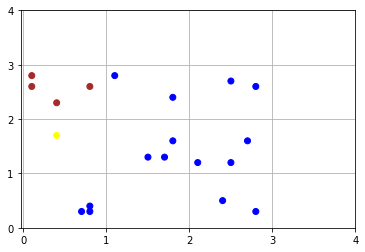

In [104]:
plt.scatter([p[0] for p in points], [p[1] for p in points], c=[p[2] for p in points])
plt.xticks(list(range(5)))
plt.yticks(list(range(5)))
plt.grid()
plt.show()

### Code from above in one cell unit

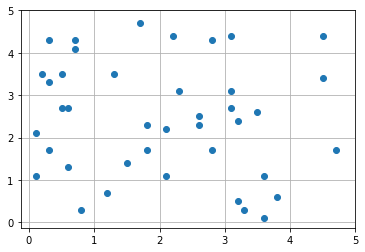

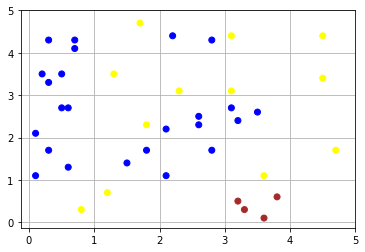

In [108]:
grid = 5
points_number = 40

x = list()
y = list()

# generate points
for n in range(points_number):
    x.append( (random.randrange(0, grid)) + (random.randrange(1, 9)/10) )
    y.append( (random.randrange(0, grid)) + (random.randrange(1, 9)/10) )

plt.scatter(x, y)
plt.xticks(list(range(grid + 1)))
plt.yticks(list(range(grid + 1)))
plt.grid()
plt.show()

# points coordinates
points = list(zip(x,y))
points = [list(x) for x in points]

# mapping cells
cells = list()
for x in range(1, grid + 2):
    row = list()
    for y in range(1, grid + 2):
        row.append([y,x, 0])
    cells.append(row)
    
# counting points in cells
for p in points:
    x = math.ceil(p[0]) - 1
    y = math.ceil(p[1]) - 1
    cells[y][x][2] += 1
    
# genereting classes based on number of points in cells     
occurrences = set()
for r in cells:
    for c in r:
        occurrences.add(c[2])
        
occurrences = list(occurrences)
classes = np.array_split(occurrences, 3)
classes = [ list(c) for c in classes]

points_class = {0: 'yellow', 1: 'blue', 2: 'brown'}

# assigning points to classes
def color_class(n):
    for i in range(len(classes)):
        if n in classes[i]:
            return points_class[i]

for p in points:
    x = math.ceil(p[0]) - 1
    y = math.ceil(p[1]) - 1
    color = color_class(cells[y][x][2])
    if len(p) < 3:
        p.append(color)
    else:
        p[2] = color
        
# plotting the results
plt.scatter([p[0] for p in points], [p[1] for p in points], c=[p[2] for p in points])
plt.xticks(list(range(grid + 1)))
plt.yticks(list(range(grid + 1)))
plt.grid()
plt.show()

## Example with a unit bigger than 1

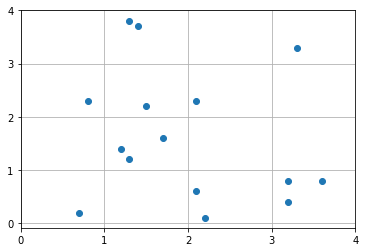

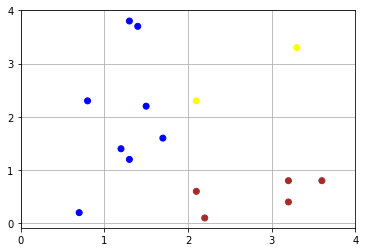

In [109]:
grid = 4
points_number = 15
unit = 2

x = list()
y = list()

# generate points
for n in range(points_number):
    x.append( (random.randrange(0, grid)) + (random.randrange(1, 9)/10) )
    y.append( (random.randrange(0, grid)) + (random.randrange(1, 9)/10) )

plt.scatter(x, y)
plt.xticks(list(range(grid + 1)))
plt.yticks(list(range(grid + 1)))
plt.grid()
plt.show()

# points coordinates
points = list(zip(x,y))
points = [list(x) for x in points]

# mapping cells
resized = math.ceil((grid + 2)/ unit)
resized = list(range(1,resized + 1))
cells = list()
for x in resized:
    row = list()
    for y in resized:
        row.append([y,x,0])
    cells.append(row)

    
# counting points in cells
for p in points:
    x = math.ceil(p[0]/unit) - 1
    y = math.ceil(p[1]/unit) - 1
    cells[y][x][2] += 1
    
    
# genereting classes based on number of points in cells     
occurrences = set()
for r in cells:
    for c in r:
        occurrences.add(c[2])

occurrences = list(occurrences)
classes = np.array_split(occurrences, 3)
classes = [ list(c) for c in classes]
points_class = {0: 'yellow', 1: 'blue', 2: 'brown'}


# assigning points to classes
def color_class(n):
    for i in range(len(classes)):
        if n in classes[i]:
            return points_class[i]

for p in points:
    x = math.ceil(p[0]/unit) - 1
    y = math.ceil(p[1]/unit) - 1
    color = color_class(cells[y][x][2])
    if len(p) < 3:
        p.append(color)
    else:
        p[2] = color
        
# plotting the results
plt.scatter([p[0] for p in points], [p[1] for p in points], c=[p[2] for p in points])
plt.xticks(list(range(grid + 1)))
plt.yticks(list(range(grid + 1)))
plt.grid()
plt.show()